##### Install and import packages

In [1]:
!pip install pandas-ods-reader
!pip install impyute
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_ods_reader import read_ods
from impyute.imputation.cs import mice
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")
import pickle
from datetime import datetime 

##### Import Input Data from Local

In [2]:
path = "C:/Users/tdong/Desktop/AT/Data.ods" #from local path
df = read_ods(path)

##### Check raw data

In [3]:
df.head(10)

,consumer_id,gender,has_gender,has_first_name,has_last_name,has_email,has_dob,customer_age,account_age,account_last_updated,account_status,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_rides,total_offer_rides,avg_claims,min_claims,max_claims,total_offers_claimed
0,1284b75c-ecae-4015-8e3d-359c0347ede8,None,0.0,1.0,1.0,1.0,0.0,NaN,188.0,174.0,0.0,1.0,3.0,3.0,8.0,52.0,1.0,1.0,1.0,1.0
1,128af162-d2c3-4fe4-986c-359c8bdc6c04,None,0.0,1.0,1.0,1.0,0.0,NaN,185.0,174.0,0.0,1.0,3.0,8.0,5.0,58.0,1.0,1.0,1.0,1.0
2,12aada5e-36eb-4e9e-8d62-359c076c1b40,None,0.0,1.0,1.0,1.0,0.0,NaN,188.0,174.0,0.0,1.0,3.0,4.0,9.0,183.0,1.0,1.0,1.0,3.0
3,12c2e02f-bc79-4048-83ba-359cd3280dcf,None,0.0,1.0,1.0,1.0,0.0,NaN,184.0,174.0,0.0,1.0,3.0,7.0,4.0,56.0,1.0,1.0,1.0,1.0
4,12fabdf0-0582-489e-a6d3-35509ab8ae6f,f,1.0,1.0,1.0,1.0,1.0,22.0,572.0,173.0,0.0,1.0,4.0,6.0,7.0,83.0,1.0,1.0,1.0,3.0
5,811625dc-6e1e-476f-bdc2-359b0b0abe20,None,0.0,1.0,1.0,1.0,0.0,NaN,193.0,174.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0
6,815d231a-d382-4aa2-8e21-359c9be5e423,f,1.0,1.0,1.0,1.0,1.0,17.0,185.0,174.0,0.0,1.0,1.0,1.0,4.0,22.0,1.0,1.0,1.0,2.0
7,818c43e7-df25-4e8b-a274-355e49e8f505,f,1.0,1.0,1.0,1.0,1.0,20.0,502.0,176.0,0.0,1.0,2.0,3.0,11.0,62.0,1.0,1.0,1.0,1.0
8,2a9258b2-0f10-4a84-ac08-359e39e3dd5c,None,0.0,1.0,1.0,1.0,0.0,NaN,177.0,174.0,0.0,1.0,1.0,2.0,4.0,12.0,1.0,1.0,1.0,1.0
9,2b07ca5f-a254-4b5a-a24d-359c01d502ee,None,0.0,1.0,1.0,1.0,0.0,NaN,188.0,177.0,0.0,1.0,3.0,4.0,4.0,49.0,1.0,1.0,1.0,2.0


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   consumer_id           10000 non-null  object 
 1   gender                5478 non-null   object 
 2   has_gender            10000 non-null  float64
 3   has_first_name        10000 non-null  float64
 4   has_last_name         10000 non-null  float64
 5   has_email             10000 non-null  float64
 6   has_dob               10000 non-null  float64
 7   customer_age          4064 non-null   float64
 8   account_age           10000 non-null  float64
 9   account_last_updated  10000 non-null  float64
 10  account_status        10000 non-null  float64
 11  app_downloads         10000 non-null  float64
 12  unique_offer_clicked  10000 non-null  float64
 13  total_offer_clicks    10000 non-null  float64
 14  unique_offer_rides    10000 non-null  float64
 15  total_offer_rides   

In [5]:
df.describe()

,has_gender,has_first_name,has_last_name,has_email,has_dob,customer_age,account_age,account_last_updated,account_status,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_rides,total_offer_rides,avg_claims,min_claims,max_claims,total_offers_claimed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,4064.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.547800,0.998000,0.995900,0.999200,0.406400,22.980807,245.816600,174.256700,0.0,1.032200,3.172400,5.825600,7.516500,68.429900,1.003003,1.001300,1.005700,1.880900
std,0.497735,0.044679,0.063903,0.028274,0.491185,8.504064,130.090693,0.895145,0.0,0.186994,2.059831,5.290424,3.490264,69.591347,0.046453,0.036034,0.079172,1.187121
min,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,174.000000,173.000000,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,184.000000,174.000000,0.0,1.000000,2.000000,2.000000,4.000000,23.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,187.000000,174.000000,0.0,1.000000,3.000000,4.000000,7.000000,47.000000,1.000000,1.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,193.000000,174.000000,0.0,1.000000,4.000000,8.000000,10.000000,90.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,119.000000,649.000000,187.000000,0.0,5.000000,14.000000,62.000000,25.000000,1693.000000,2.500000,2.000000,4.000000,11.000000


There are 10,000 data points with 20 features. The ID feature is 'consumer_id'. Ther are 2 features with missing values. Next step will check missing values and how I treat them. 

##### Check missing values

In [6]:
def missing_value(df1):
  missing1=df1.isnull().mean().mul(100).sort_values(ascending=False).to_frame('Missing_perc').reset_index()
  return missing1
missing_value(df).head(5)

,index,Missing_perc
0,customer_age,59.36
1,gender,45.22
2,consumer_id,0.00
3,app_downloads,0.00
4,max_claims,0.00


In [7]:
df.gender.value_counts(dropna=False)

NaN    4522
m      2864
f      2614
Name: gender, dtype: int64

Found there are 2 features with missing values ('customer_age', 'gender'). I will treat them differently as gender is categorical feature and customer_age is continuos feature.

In [8]:
#impute missing gender for later use
missing_cat_list=['gender']
for i in missing_cat_list:
  df[i].fillna('missing', inplace=True)

In [9]:
#impute age using MICE (Multivariate Imputation by Chained Equations)
df_dropped= df.drop(['consumer_id','gender'], axis=1)
imputed = mice(df_dropped.values)
mice_ages = imputed[:, 5]
df['customer_age_imputed']= [round(age,0) for age in mice_ages]
df['customer_age_imputed'] = df['customer_age_imputed'].apply(lambda x: 15 if (x<15) else x)
df['customer_age_imputed'] = df['customer_age_imputed'].apply(lambda x: 119 if (x>119) else x)

In [10]:
def list_non_unique_features_pdf(data, drop=True):

    if not isinstance(data, pd.core.frame.DataFrame):
        raise AssertionError("Data is not a pandas DataFrame")

    all_missing_cols = [
        col
        for col, n_uniques in data.apply(lambda x: len(x.unique()), axis=0).iteritems()
        if n_uniques <= 1
    ]

    if len(all_missing_cols) == 0:
        print("No columns contain a single value or all missing")
    else:
        msg = ("Columns which only contain a single value or all missing : {}").format(
            (", ").join(col for col in all_missing_cols)
        )

        print(msg)

        if drop:
            data = data.drop(all_missing_cols, axis=1)

    return all_missing_cols

list_non_unique_features_pdf(df)

Columns which only contain a single value or all missing : account_status


['account_status']

In [11]:
df['account_status'].value_counts()

0.0    10000
Name: account_status, dtype: int64

'account_status' has only 1 value so it is not useful for modeling or profiling

#### Find Duplicates

In [12]:
df.duplicated(subset = 'consumer_id',keep=False).sum()

224

Found couple hundreds of duplicates 'consumer_id' in the data. Check futher the duplicates are similar in most of the feature but "app_downloads". I consider create a new feature to keep tracking those in later stage

In [13]:
df[df["consumer_id"].duplicated(keep=False)].sort_values(['consumer_id'],ascending=False)

,consumer_id,gender,has_gender,has_first_name,has_last_name,has_email,has_dob,customer_age,account_age,account_last_updated,...,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_rides,total_offer_rides,avg_claims,min_claims,max_claims,total_offers_claimed,customer_age_imputed
8990,fee2ea60-9d3d-4e24-b418-359cd92d6c2c,f,1.0,1.0,1.0,1.0,1.0,20.0,184.0,174.0,...,1.0,4.0,9.0,4.0,47.0,1.0,1.0,1.0,1.0,20.0
8989,fee2ea60-9d3d-4e24-b418-359cd92d6c2c,f,1.0,1.0,1.0,1.0,1.0,20.0,184.0,174.0,...,2.0,4.0,9.0,4.0,47.0,1.0,1.0,1.0,1.0,20.0
7421,f5a3c8c4-32c2-4f66-9a35-359cd8c01356,missing,0.0,1.0,1.0,1.0,0.0,NaN,184.0,174.0,...,2.0,4.0,6.0,4.0,14.0,1.0,1.0,1.0,1.0,24.0
7422,f5a3c8c4-32c2-4f66-9a35-359cd8c01356,missing,0.0,1.0,1.0,1.0,0.0,NaN,184.0,174.0,...,1.0,4.0,6.0,4.0,14.0,1.0,1.0,1.0,1.0,24.0
2960,f55ee256-faac-4d55-8d09-35448e6a8fed,m,1.0,1.0,1.0,1.0,1.0,17.0,633.0,175.0,...,1.0,1.0,1.0,8.0,39.0,1.0,1.0,1.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7236,037a869d-a284-4da2-8c06-359cda1af62b,missing,0.0,1.0,1.0,1.0,0.0,NaN,184.0,174.0,...,1.0,2.0,3.0,4.0,29.0,1.0,1.0,1.0,1.0,24.0
7225,01aa83a3-06d5-4356-88c3-359cd984c48e,m,1.0,1.0,1.0,1.0,1.0,19.0,184.0,174.0,...,2.0,1.0,1.0,4.0,11.0,1.0,1.0,1.0,1.0,19.0
7224,01aa83a3-06d5-4356-88c3-359cd984c48e,m,1.0,1.0,1.0,1.0,1.0,19.0,184.0,174.0,...,1.0,1.0,1.0,4.0,11.0,1.0,1.0,1.0,1.0,19.0
5000,0047f9db-58c9-40e5-a891-357e4d931c16,missing,0.0,1.0,1.0,1.0,0.0,NaN,339.0,174.0,...,1.0,13.0,27.0,15.0,432.0,1.0,1.0,1.0,4.0,22.0


In [14]:
df['duplicated']=df["consumer_id"].duplicated(keep=False)

##### Check outlier by IQR (Interquartile Range) and Box Plot

                  index    0
0  total_offers_claimed  978
1     total_offer_rides  550
2  unique_offer_clicked  444
3    total_offer_clicks  383
4         app_downloads  308


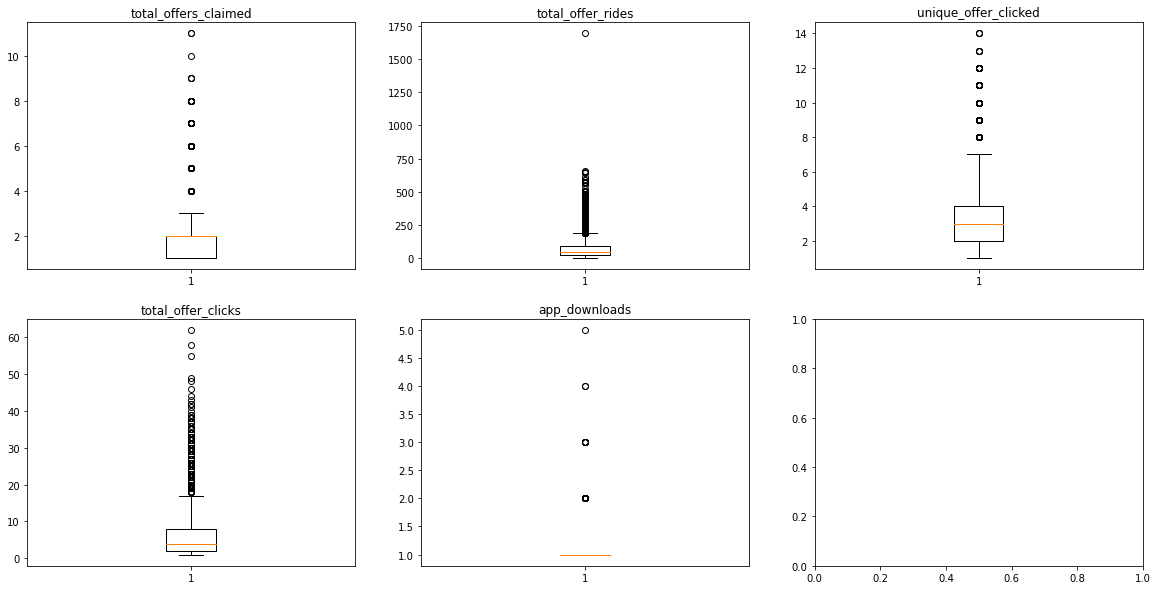

In [15]:
outlier_excl=['consumer_id',"gender",'duplicated','customer_age',"duplicated",'customer_age_imputed',
              'account_age','account_last_updated']
def IQR(df):
  df=df.loc[:, ~df.columns.isin(outlier_excl)]
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  df_outlier=((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
  return df_outlier.sort_values(ascending=False).reset_index()
no_of_outlier_threshold=100
outlier1=IQR(df)
print(outlier1.loc[outlier1[0]>no_of_outlier_threshold,:])

outlier_list1=outlier1.loc[outlier1[0]>no_of_outlier_threshold,:]["index"]
fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20, 10))
for i, ax in zip(outlier_list1, axes.flatten()):
    ax.boxplot(df[i])
    ax.title.set_text(i)
plt.show()


This is the first method we use to detect outlier or anomaly observations. We are using the IQR method which define an outlier is a datapoint low than Q1- 1.5*IQR or larger than Q3+1.5*IQR ( IQR= Third quartile(Q3) - First Quartile(Q2). This method help us to identify by visual how many outliers in each feature.

Among all feature, we found there are 5 features ('total_offers_claimed', 'total_offer_rides', 'unique_offer_clicked', 'total_offer_clicks','app_downloads') having more than 100 outliers using the IQR method.

By visualising those feature in box plot, we can easily see the outliers. 

This method only help to identify if any outlier in each seperate variable and can be used as a reference as feature selection. 

##### Check Pearson Correlation 

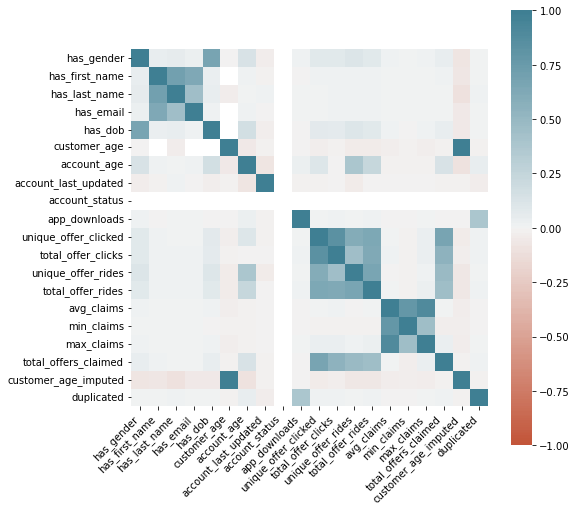

In [16]:
corr = df.corr()
plt.rcParams["figure.figsize"] = (8,8)

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right'
);

Do a quick check of Pearson Correlation to see if any features have high correlated with another feature.
Easily can see 'customer_age' and 'customer_imputed_age' are highly correlated and a few highly correlation in click/ride/claim features. This should be taken into account when select feature for the model. 

In [17]:
dummy_list = ['gender','duplicated']

# One hot encoding
for i in dummy_list:  
    print(i)
    print(df[i].nunique())
    df_d = pd.get_dummies(df[i],prefix=i, drop_first=False,dummy_na=False)
#   df = df.drop(columns = [i])
    df = pd.concat([df, df_d], axis=1,sort=False)

gender
3
duplicated
2


#### Feature Selection

In [18]:
cols = [i.lower() for i in df.columns ]
df.columns = cols

Base on our Exploratory Data Analysis and Inference statistics, we only use 'app_downloads','unique_offer_clicked','total_offer_clicks','total_offer_rides','total_offers_claimed' for data modeling. Those variables are representative for engagement profile and commute profile. 

The rest features (including new created features) will be used for profiling fraud customers. 

In [19]:
train_feature=['app_downloads','unique_offer_clicked','total_offer_clicks','total_offer_rides','total_offers_claimed']

profile_feature=['gender','has_first_name',
 'has_last_name',
 'has_email',
 'has_dob',
 'account_age',
 'account_last_updated',
 'app_downloads',
 'unique_offer_clicked',
 'total_offer_clicks',
 'unique_offer_rides',
 'total_offer_rides',
 'avg_claims',
 'min_claims',
 'max_claims',
 'total_offers_claimed',
 'duplicated',
 'customer_age_imputed',
 'gender_f',
 'gender_m',
 'gender_missing',
 'duplicated_false',
 'duplicated_true']
# list of feature in numeric format using for profiling
profile_number=[
 'account_age',
 'account_last_updated',
 'app_downloads',
 'unique_offer_clicked',
 'total_offer_clicks',
 'unique_offer_rides',
 'total_offer_rides',
 'avg_claims',
 'min_claims',
 'max_claims',
 'total_offers_claimed',
 'customer_age_imputed']
# list of feature in categorical format using for profiling
profile_cat=['gender','has_first_name',
 'has_last_name',
 'has_email',
 'has_dob',
 'duplicated']

In [20]:
df_train = df.loc[:,train_feature]

#### Model Training

The data is unlabeled so we only can use unsupervised machine learning model. Isolation Forest is the algorithm to be used in this project. The Isolation Forest  ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature (source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest) 

Isolation Forest is choosen for following reasons: 
* One of the fastest algorithm to detect anomaly
* Don't need any feature standisation or normalisation
* Don't need any feature reduction method
* Easy to use the model output
* Suitable for constraint of time and effort for this project. 

Key model parameters:
* n_estimators: The number of base estimators in the ensemble (default =100)
* max_samples:The number of samples to draw from training dataset to train each base estimator (default = 256)
* contamination: The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the scores of the samples. (default = 0.1)

We are using unlabeled data to train the model so we can't run any parameter tuning to choose the best parameter for the model. So for now using the all default parameters except contamination = 0.05 which mean we expected about 3% of the dataset is outliers.  

IsolationForest(contamination=0.03, max_samples=256)


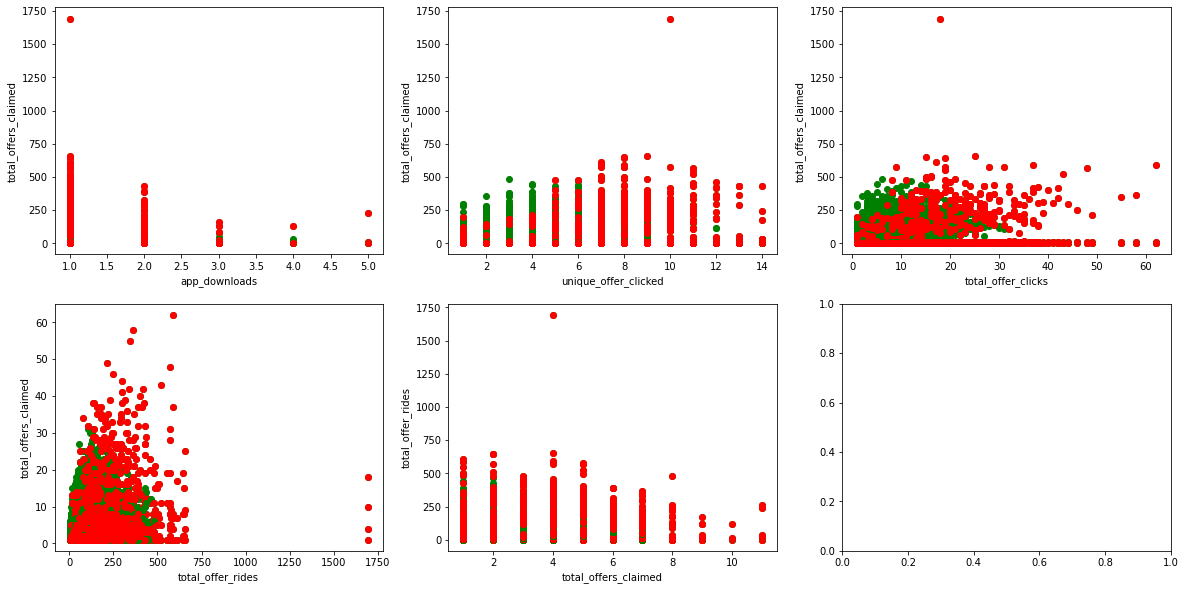

In [21]:
estimator=100
max_sample=256
contamination=0.03

iforest = IsolationForest(n_estimators=estimator, max_samples=max_sample, contamination=contamination)
print(iforest)

#fit the model
iforest.fit(df_train)

#get prediction from model
pred =iforest.predict(df_train)

#Visualise anomoly
anom_index = np.where(pred ==-1)
values = df_train.iloc[anom_index]
fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20, 10))
for i, ax in zip(train_feature, axes.flatten()):
    for j in train_feature:
        if i!=j:
            ax.scatter(df_train[i], df_train[j],color='g')
            ax.scatter(values[i], values[j], color='r')
            ax.set_xlabel(i)
            ax.set_ylabel(j)
plt.show()          

In [22]:
np.count_nonzero(pred == 1)

9700

Model identify 3% of dataset (300 observations) as outlier or anomaly. Those fraud customers are visualised in red color in the chart above. 

IsolationForest is not able to provide feature importance which help us to find which feature is important to identify the outliers. We need to use another tree model to identify the feature important base on all features and predicted value from Isolation Forest. 


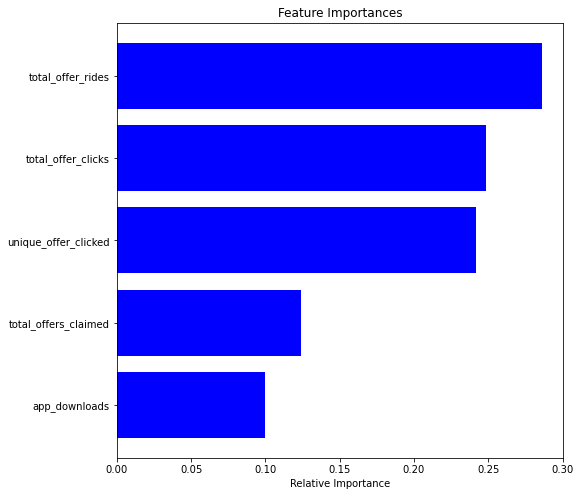

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=6, random_state=1, n_estimators=100)
rf.fit(df_train, pred)  
importances = rf.feature_importances_
indices = np.argsort(importances)
features = df_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can see 'unique_offer_clicked' is the most important feature to determine which customer are likely to be fraud
In oppsite, 'app_downloads' is less important feature.

#### Findings

Save prediction value back to training data to find some key insight

In [24]:
df_trained=df[profile_feature]
df_trained['label']= pred
df_trained['label_name']= df_trained['label'].apply(lambda x: "Outlier" if (x==-1) else "Inliner")

In [25]:
df_trained['label_name'].value_counts()

Inliner    9700
Outlier     300
Name: label_name, dtype: int64

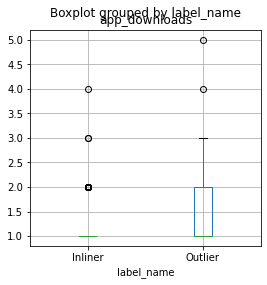

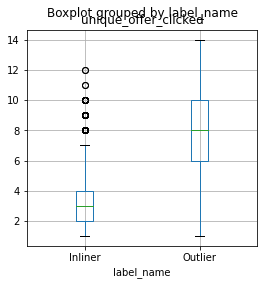

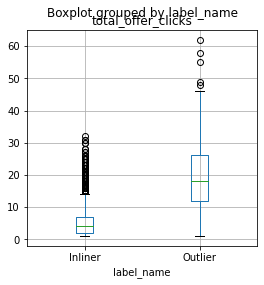

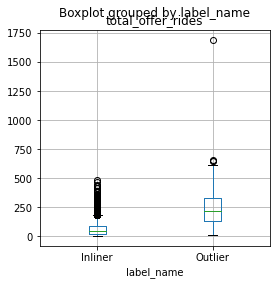

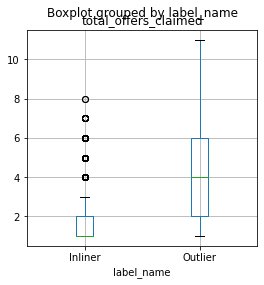

In [26]:
plt.rcParams["figure.figsize"] = (4,4)
for i in train_feature:
    df_trained.boxplot(i, by="label_name")

In [27]:
df_trained.groupby('label_name')[profile_number].mean().T

label_name,Inliner,Outlier
account_age,244.328660,293.926667
account_last_updated,174.256804,174.253333
app_downloads,1.022268,1.353333
unique_offer_clicked,3.031443,7.730000
total_offer_clicks,5.401649,19.533333
unique_offer_rides,7.372062,12.186667
total_offer_rides,63.016289,243.470000
avg_claims,1.003021,1.002444
min_claims,1.001340,1.000000
max_claims,1.005670,1.006667


In [28]:
df_trained.loc[df_trained["label_name"]=="Outlier",:]

,gender,has_first_name,has_last_name,has_email,has_dob,account_age,account_last_updated,app_downloads,unique_offer_clicked,total_offer_clicks,...,total_offers_claimed,duplicated,customer_age_imputed,gender_f,gender_m,gender_missing,duplicated_false,duplicated_true,label,label_name
54,missing,1.0,1.0,1.0,0.0,189.0,174.0,2.0,3.0,3.0,...,2.0,True,24.0,0,0,1,0,1,-1,Outlier
91,f,1.0,1.0,1.0,1.0,483.0,174.0,1.0,9.0,27.0,...,5.0,False,18.0,1,0,0,1,0,-1,Outlier
152,m,1.0,1.0,1.0,1.0,233.0,174.0,2.0,6.0,10.0,...,1.0,False,22.0,0,1,0,1,0,-1,Outlier
197,missing,1.0,1.0,1.0,1.0,648.0,175.0,2.0,3.0,8.0,...,2.0,False,19.0,0,0,1,1,0,-1,Outlier
236,missing,1.0,1.0,1.0,0.0,180.0,177.0,2.0,6.0,10.0,...,4.0,False,24.0,0,0,1,1,0,-1,Outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9843,missing,1.0,1.0,1.0,0.0,188.0,174.0,1.0,8.0,26.0,...,1.0,False,23.0,0,0,1,1,0,-1,Outlier
9926,missing,1.0,1.0,1.0,0.0,193.0,174.0,1.0,9.0,16.0,...,5.0,False,23.0,0,0,1,1,0,-1,Outlier
9952,f,1.0,1.0,1.0,1.0,183.0,174.0,1.0,8.0,21.0,...,1.0,False,19.0,1,0,0,1,0,-1,Outlier
9957,missing,1.0,1.0,1.0,0.0,584.0,177.0,2.0,8.0,12.0,...,2.0,False,21.0,0,0,1,1,0,-1,Outlier


In [29]:
Q1 = df_trained.loc[df_trained["label_name"]=="Outlier", df_trained.columns.isin(train_feature)].quantile(0.25)
Q1

app_downloads             1.0
unique_offer_clicked      6.0
total_offer_clicks       12.0
total_offer_rides       134.0
total_offers_claimed      2.0
Name: 0.25, dtype: float64

Indicators/ Signal of fraud customers (based on Q1 -1first quartile of outliers):
* Download app from 2 time
* Unique offer click from 5 times
* Total offer click from 11 times
* Total offer drive from 117 times
* Total offer claimed from 3 times


#### Fraud Customer Profile

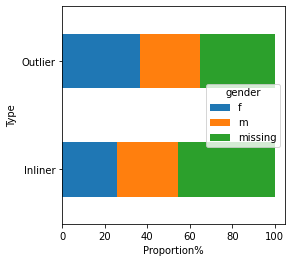

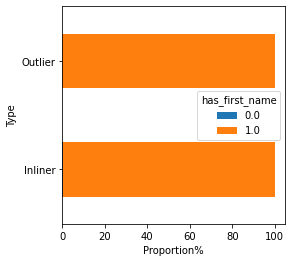

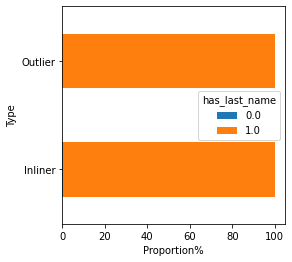

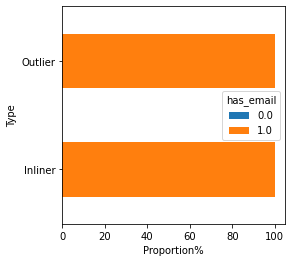

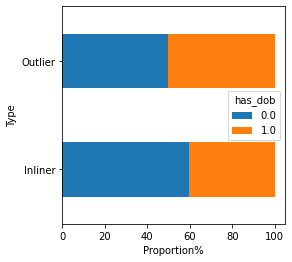

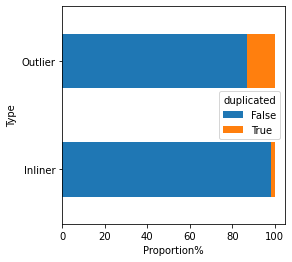

In [30]:
plt.rcParams["figure.figsize"] = (4,4)
for i in profile_cat: 
    df_pct = (df_trained.groupby(['label_name',i])['label'].count()/df_trained.groupby(['label_name'])['label'].count())*100
    df_pct.unstack().plot(kind = 'barh', stacked = True,rot=0)
    plt.xlabel('Proportion%')
    plt.ylabel('Type')
    plt.legend(title=i,loc='center right')

In [31]:
df_trained.groupby('label_name')[profile_number].mean().T

label_name,Inliner,Outlier
account_age,244.328660,293.926667
account_last_updated,174.256804,174.253333
app_downloads,1.022268,1.353333
unique_offer_clicked,3.031443,7.730000
total_offer_clicks,5.401649,19.533333
unique_offer_rides,7.372062,12.186667
total_offer_rides,63.016289,243.470000
avg_claims,1.003021,1.002444
min_claims,1.001340,1.000000
max_claims,1.005670,1.006667


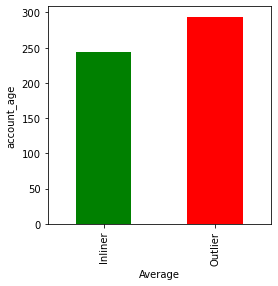

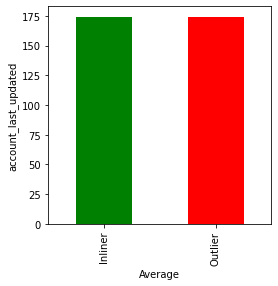

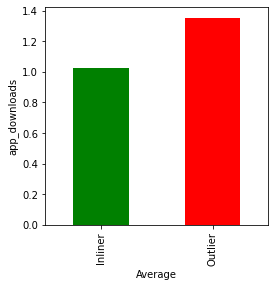

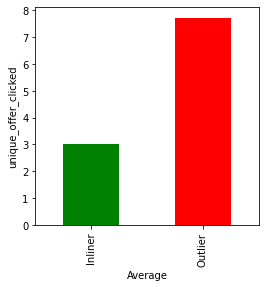

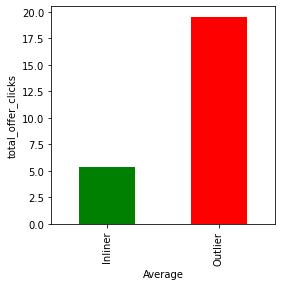

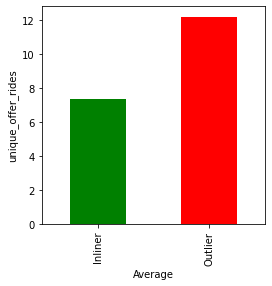

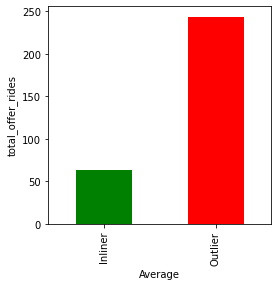

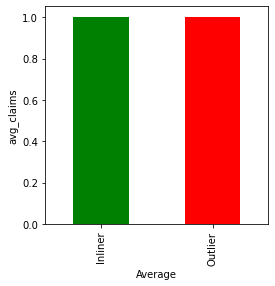

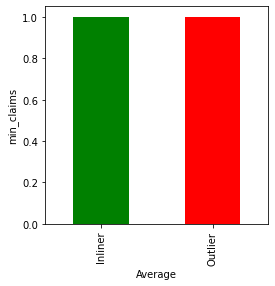

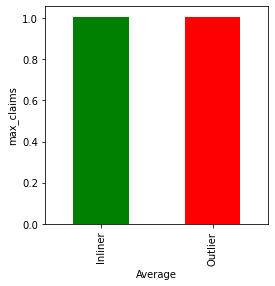

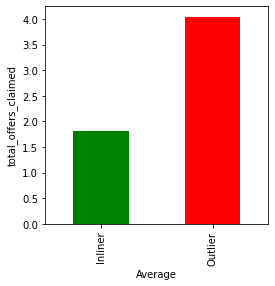

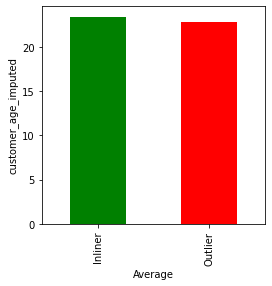

In [32]:
plt.rcParams["figure.figsize"] = (4,4)
for i in profile_number: 
    df_trained.groupby('label_name')[i].mean().plot(kind = 'bar', color=['g','r'])
    plt.ylabel(i)
    plt.xlabel('Average')
    plt.show()

Save the model for future use or for prediction

In [33]:
# Current date time in local system 
model_date = str(datetime.date(datetime.now())).replace("-", "_")
pickle.dump(iforest, open(path+"anomaly_iforest"+model_date+".pkl", "wb"))